In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Generate toy-spectra

In [2]:
k = np.arange(900, 1800, 5)

In [3]:
a=[]

for i in range(100):
    a.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(1+(np.random.rand()-0.5)*0.5) ) 

A = pd.DataFrame(np.column_stack((k, *a)))

In [4]:
b=[]

for i in range(100):
    b.append( norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(2+(np.random.rand()-0.5)*0.5) ) 

B = pd.DataFrame(np.column_stack((k, *b)))

In [5]:
c=[]

for i in range(100):
    c.append( norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(3+(np.random.rand()-0.5)*0.5) ) 

C = pd.DataFrame(np.column_stack((k, *c)))

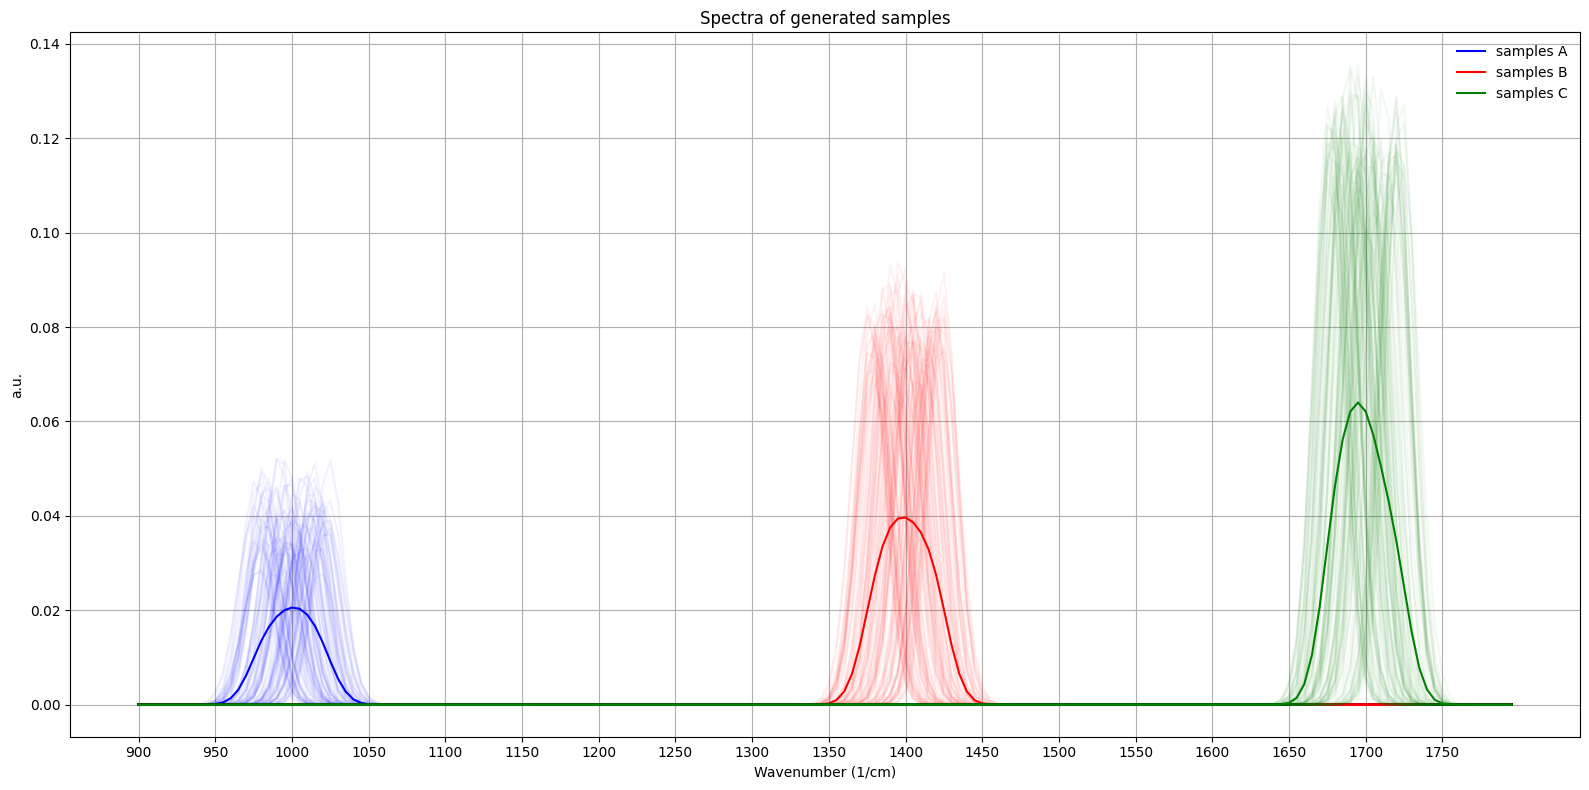

In [6]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)
###
sample_measurement = []
B_plot = pd.melt(B, [0])
for sample, measurement in B_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="samples B", legend=True
)
###
sample_measurement = []
C_plot = pd.melt(C, [0])
for sample, measurement in C_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="green")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="green", label="samples C", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [7]:
A = A.set_index([0])
A.index.names = ['Wavenumbers']
A.columns = ['A_'+str(col) for col in A.columns]

B = B.set_index([0])
B.index.names = ['Wavenumbers']
B.columns = ['B_'+str(col) for col in B.columns]

C = C.set_index([0])
C.index.names = ['Wavenumbers']
C.columns = ['C_'+str(col) for col in C.columns]

df0 = pd.concat([A,B,C], axis=1)

In [8]:
df0

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,...,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99,C_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,1.294585e-12,1.189176e-24,5.110794e-23,9.218670e-27,1.323895e-31,7.342748e-26,9.450319e-15,1.766405e-27,5.254490e-26,2.514019e-16,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
905.0,2.895794e-11,1.390292e-22,5.277979e-21,1.331236e-24,6.307394e-29,1.281553e-23,2.875026e-13,3.813709e-25,1.139860e-23,1.148394e-14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
910.0,5.230291e-10,1.291322e-20,4.308528e-19,1.530541e-22,2.242740e-26,1.729412e-21,7.064580e-12,6.349382e-23,1.875111e-21,4.135962e-13,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
915.0,7.627908e-09,9.528655e-19,2.780176e-17,1.401001e-20,5.951691e-24,1.804446e-19,1.402103e-10,8.151582e-21,2.339146e-19,1.174426e-11,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
920.0,8.982689e-08,5.585953e-17,1.418070e-15,1.021022e-18,1.178785e-21,1.455705e-17,2.247620e-09,8.070101e-19,2.212801e-17,2.629288e-10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.434339e-17,1.624201e-19,2.021108e-13,9.057950e-19,2.223883e-15,2.554331e-08,2.225257e-21,7.510944e-21,1.938756e-12,8.100929e-21
1780.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.955541e-19,1.438307e-21,4.868088e-15,9.405161e-21,4.115707e-17,1.402849e-09,1.641565e-23,7.237743e-23,7.005894e-14,6.551744e-23
1785.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.143433e-21,9.850869e-24,9.223379e-17,7.606062e-23,6.006545e-19,5.993914e-11,9.410699e-26,5.532588e-25,2.053518e-15,4.129425e-25
